In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import det, lu

In [7]:
np.set_printoptions(precision=3, suppress=True)

mu = [2, 3]
Cov = [[2, 1.5], [1.5, 4]]
np.random.seed(0)
R = np.random.multivariate_normal(mu, Cov, 100)
print(Cov)

[[2, 1.5], [1.5, 4]]


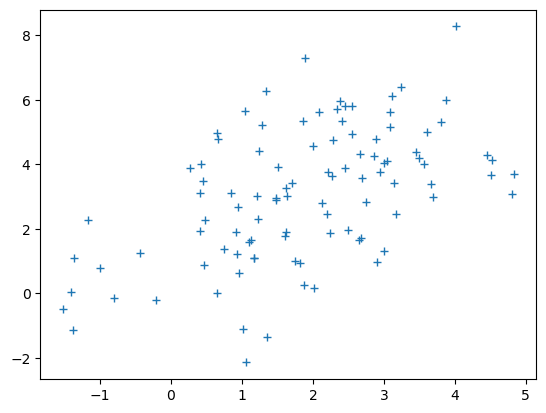

In [11]:
plt.plot(R[:, 0], R[:, 1], '+')

In [15]:
Sample_cov = np.cov(R, rowvar=False)
Cor = np.corrcoef(R, rowvar=False)

print("Sample_cov:\n", Sample_cov)
print("Cor:\n", Cor)

Sample_cov:
 [[2.048 1.555]
 [1.555 4.267]]
Cor:
 [[1.    0.526]
 [0.526 1.   ]]


In [17]:
r = 2.2380 / (np.sqrt(2.7023) * np.sqrt(4.7411))
print(r)

0.6252500624287102


## Perform PCA on the bi-variate normal random numbers

In [28]:
pca = PCA()
pca.fit(R)
score = pca.fit_transform(R)
loading_vector = pca.components_
latent = pca.explained_variance_
tsquared = np.sum((score / np.sqrt(latent))**2, axis=1)
variablity_explained = pca.explained_variance_ratio_
mu = pca.mean_

print("Loading vectors:\n", loading_vector)
print("Variability explained:\n", variablity_explained)

Loading vectors:
 [[ 0.458  0.889]
 [ 0.889 -0.458]]
Variability explained:
 [0.803 0.197]


In [30]:
correlation_matrix = np.corrcoef(score, rowvar=False)

print("Correlation matrix:\n", correlation_matrix)

Correlation matrix:
 [[1. 0.]
 [0. 1.]]


In [36]:
# Calculate the norm of the irst loading vectors
norm_vector_1 = np.linalg.norm(loading_vector[:, 0])

norm_vector_2 = np.linalg.norm(loading_vector[:, 1])

dot_product = np.dot(loading_vector[:, 0], loading_vector[:, 1])


print("Norm of the first loading vector:", norm_vector_1)
print("Norm of the second loading vector:", norm_vector_2)
print("Dot product of the first and second loading vectors:", dot_product)

Norm of the first loading vector: 1.0
Norm of the second loading vector: 1.0
Dot product of the first and second loading vectors: 0.0


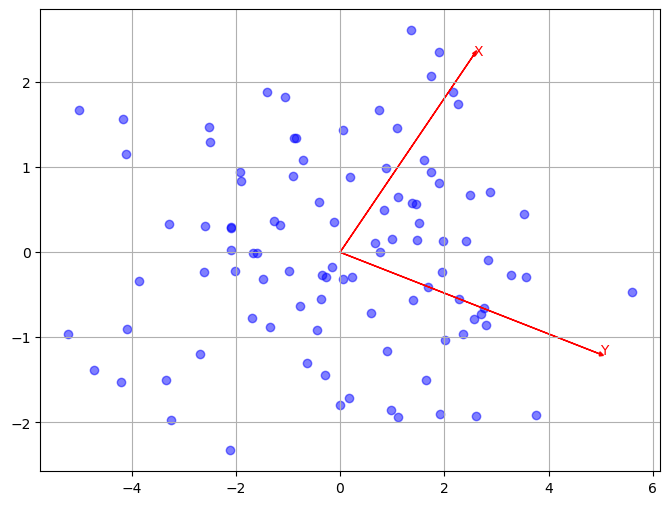

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 0], score[:, 1], c='blue', label='Scores', alpha=0.5)

# Plot the loading vectors
for i in range(loading_vector.shape[1]):
    plt.arrow(0, 0, loading_vector[0, i]*max(score[:, 0]), loading_vector[1, i]*max(score[:, 1]), 
              color='red', head_width=0.05)

# Annotate the variables
plt.text(loading_vector[0, 0]*max(score[:, 0]), loading_vector[1, 0]*max(score[:, 1]), 'X', color='red')
plt.text(loading_vector[0, 1]*max(score[:, 0]), loading_vector[1, 1]*max(score[:, 1]), 'Y', color='red')

plt.grid()

 ## Perform PCA step-by-step

In [47]:
# Initialize an empty array for data
data = np.empty_like(R)

# Standardize the first column
data[:, 0] = R[:, 0] - np.mean(R[:, 0])

# Standardize the second column
data[:, 1] = R[:, 1] - np.mean(R[:, 1])


In [49]:
Cov = np.cov(data, rowvar=False)

print("Covariance matrix:\n", Cov)

Covariance matrix:
 [[2.048 1.555]
 [1.555 4.267]]


In [51]:
Cor = np.corrcoef(data, rowvar=False)

print("Correlation coefficient matrix:\n", Cor)

Correlation coefficient matrix:
 [[1.    0.526]
 [0.526 1.   ]]


In [77]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
lambda_, loading_vector = np.linalg.eig(Cov)

print("Eigenvectors (Loading vectors):\n", loading_vector)
print("Eigenvalues:\n", lambda_)

Eigenvectors (Loading vectors):
 [[-0.889 -0.458]
 [ 0.458 -0.889]]
Eigenvalues:
 [1.247 5.068]


In [57]:
product = np.dot(Cov, loading_vector[:, 0])

scaled_vector = lambda_[0] * loading_vector[:, 0]

print("Cov * first loading vector:\n", product)
print("First eigenvalue * first loading vector:\n", scaled_vector)

Cov * first loading vector:
 [-1.109  0.571]
First eigenvalue * first loading vector:
 [-1.109  0.571]


In [59]:
product = np.dot(Cov, loading_vector[:, 1])

scaled_vector = lambda_[1] * loading_vector[:, 1]

print("Cov * second loading vector:\n", product)
print("Second eigenvalue * second loading vector:\n", scaled_vector)

Cov * second loading vector:
 [-2.32  -4.505]
Second eigenvalue * second loading vector:
 [-2.32  -4.505]


In [61]:
norm_vector_1 = np.linalg.norm(loading_vector[:, 0])
norm_vector_2 = np.linalg.norm(loading_vector[:, 1])

dot_product = np.dot(loading_vector[:, 0], loading_vector[:, 1])

print("Norm of the first loading vector:", norm_vector_1)
print("Norm of the second loading vector:", norm_vector_2)
print("Dot product of the first and second loading vectors:", dot_product)

Norm of the first loading vector: 1.0
Norm of the second loading vector: 1.0
Dot product of the first and second loading vectors: 0.0


In [63]:
print("Loading vector:\n", loading_vector)

Loading vector:
 [[-0.889 -0.458]
 [ 0.458 -0.889]]


In [67]:
# Transpose the loading vector and data
loading_vector_transposed = loading_vector.T
data_transposed = data.T
# Calculate the score
score = np.dot(loading_vector_transposed, data_transposed)
score = score.T
# Flip the score matrix left to right
score = np.fliplr(score)

In [69]:
correlation_matrix = np.corrcoef(score, rowvar=False)

print("Correlation coefficient matrix:\n", correlation_matrix)

Correlation coefficient matrix:
 [[1. 0.]
 [0. 1.]]


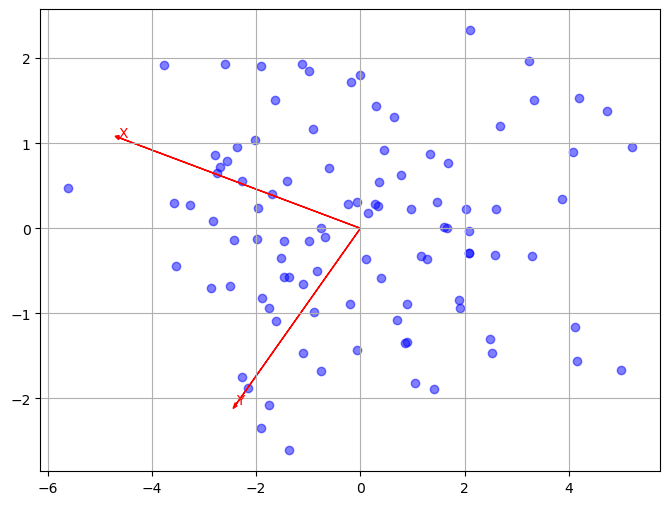

In [75]:
# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the scores
plt.scatter(score[:, 0], score[:, 1], c='blue', label='Scores', alpha=0.5)

# Plot the loading vectors
for i in range(loading_vector.shape[1]):
    plt.arrow(0, 0, loading_vector[0, i] * max(score[:, 0]), loading_vector[1, i] * max(score[:, 1]),
              color='red', head_width=0.05)

# Annotate the variables with specific labels
plt.text(loading_vector[0, 0] * max(score[:, 0]), loading_vector[1, 0] * max(score[:, 1]), 'X', color='red')
plt.text(loading_vector[0, 1] * max(score[:, 0]), loading_vector[1, 1] * max(score[:, 1]), 'Y', color='red')
plt.grid()

In [79]:
variance = np.var(score, axis=0)
proportion_variance_explained = variance / np.sum(variance)

print("Variance of each principal component:\n", variance)
print("Proportion of variance explained by each principal component:\n", proportion_variance_explained)

Variance of each principal component:
 [5.017 1.234]
Proportion of variance explained by each principal component:
 [0.803 0.197]


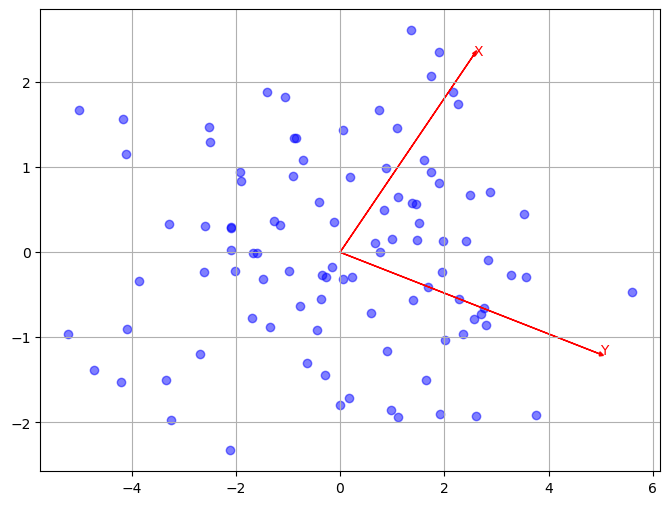

In [81]:
pca = PCA()
score = pca.fit_transform(data)

# Get the loading vectors
loading_vector = pca.components_.T

latent = pca.explained_variance_
tsquared = np.sum((score / np.sqrt(latent))**2, axis=1)
variability_explained = pca.explained_variance_ratio_

# Get the mean of each feature (mu)
mu = np.mean(data, axis=0)

plt.figure(figsize=(8, 6))

# Plot the scores
plt.scatter(score[:, 0], score[:, 1], c='blue', label='Scores', alpha=0.5)

# Plot the loading vectors
for i in range(loading_vector.shape[1]):
    plt.arrow(0, 0, loading_vector[0, i] * max(score[:, 0]), loading_vector[1, i] * max(score[:, 1]),
              color='red', head_width=0.05)

# Annotate the variables with specific labels
plt.text(loading_vector[0, 0] * max(score[:, 0]), loading_vector[1, 0] * max(score[:, 1]), 'X', color='red')
plt.text(loading_vector[0, 1] * max(score[:, 0]), loading_vector[1, 1] * max(score[:, 1]), 'Y', color='red')
plt.grid()

In [83]:
print("Loading vectors (principal components):\n", loading_vector)

Loading vectors (principal components):
 [[ 0.458  0.889]
 [ 0.889 -0.458]]


 ## Perform eigendecomposition step-by-step

In [86]:
print("Covariance matrix:\n", Cov)
a = 1
b = -Cov[0, 0] - Cov[1, 1]
c = Cov[0, 0] * Cov[1, 1] - Cov[0, 1] * Cov[1, 0]

# Create the polynomial
polynomial = [a, b, c]

# Calculate the roots (eigenvalues) of the polynomial
eigenvalues = np.roots(polynomial)

print("Eigenvalues:\n", eigenvalues)

Covariance matrix:
 [[2.048 1.555]
 [1.555 4.267]]
Eigenvalues:
 [5.068 1.247]


In [88]:
# Create the first lambda matrix
lambda1 = np.diag([eigenvalues[0], eigenvalues[0]])

# Calculate Char1 and its determinant
Char1 = Cov - lambda1
det_Char1 = np.linalg.det(Char1)

# Create the second lambda matrix
lambda2 = np.diag([eigenvalues[1], eigenvalues[1]])

# Calculate Char2 and its determinant
Char2 = Cov - lambda2
det_Char2 = np.linalg.det(Char2)


print("lambda1:\n", lambda1)
print("Char1:\n", Char1)
print("Determinant of Char1:", det_Char1)

print("lambda2:\n", lambda2)
print("Char2:\n", Char2)
print("Determinant of Char2:", det_Char2)

lambda1:
 [[5.068 0.   ]
 [0.    5.068]]
Char1:
 [[-3.02   1.555]
 [ 1.555 -0.801]]
Determinant of Char1: -6.7051350634206715e-16
lambda2:
 [[1.247 0.   ]
 [0.    1.247]]
Char2:
 [[0.801 1.555]
 [1.555 3.02 ]]
Determinant of Char2: 0.0


In [90]:
# Calculate the characteristic polynomial coefficients
poly_coefficients = np.poly(Cov)

# Calculate the roots of the characteristic polynomial (eigenvalues)
eigenvalues = np.roots(poly_coefficients)

print("Eigenvalues:\n", eigenvalues)

Eigenvalues:
 [5.068 1.247]


In [104]:
# Assign `Char1` to `A1`
A1 = Char1

# Calculate the rank of `A1`
A1_rank = np.linalg.matrix_rank(A1)

# Calculate the determinant of `A1`
A1_det = np.linalg.det(A1)

# Compute the row-reduced echelon form (RREF) of `A1`
# `lu` returns P, L, U matrices where U is the row echelon form
_, _, U = lu(A1)

# Print the results
print("A1:\n", A1)
print("Rank of A1:", A1_rank)
print("Determinant of A1:", A1_det)
print("Row-Reduced Echelon Form (RREF) of A1:\n", U)

A1:
 [[-3.02   1.555]
 [ 1.555 -0.801]]
Rank of A1: 1
Determinant of A1: -6.7051350634206715e-16
Row-Reduced Echelon Form (RREF) of A1:
 [[-3.02   1.555]
 [ 0.     0.   ]]


In [118]:
A1 = Char1
# Calculate the rank of `A1`
A1_rank = np.linalg.matrix_rank(A1)

# Calculate the determinant of `A1`
A1_det = np.linalg.det(A1)

# Compute the row-reduced echelon form (RREF) of `A1`
def rref(A):
    A = A.astype(float)
    rows, cols = A.shape
    r = 0
    for c in range(cols):
        if r >= rows:
            break
        pivot_row = np.argmax(np.abs(A[r:rows, c])) + r
        if A[pivot_row, c] == 0:
            continue
        A[[r, pivot_row]] = A[[pivot_row, r]]
        A[r] = A[r] / A[r, c]
        for i in range(rows):
            if i != r:
                A[i] -= A[r] * A[i, c]
        r += 1
    return A

# Calculate the RREF of `A1`
A1_red = rref(A1)

# Print the results
print("A1:\n", A1)
print("Rank of A1:", A1_rank)
print("Determinant of A1:", A1_det)
print("Row-Reduced Echelon Form (RREF) of A1:\n", A1_red)

A1:
 [[-3.02   1.555]
 [ 1.555 -0.801]]
Rank of A1: 1
Determinant of A1: -6.7051350634206715e-16
Row-Reduced Echelon Form (RREF) of A1:
 [[1. 0.]
 [0. 1.]]


In [120]:
v1 = np.array([-A1_red[0, 1], 1])

# Calculate the norm of v1
v1_norm = np.linalg.norm(v1)

# Normalize the vector v1 to get the eigenvector
eigenvector1 = v1 / v1_norm

print("Normalized eigenvector1:\n", eigenvector1)

Normalized eigenvector1:
 [-0.  1.]


In [124]:
A2 = Char2

# Define the custom rref function
def rref(A):
    A = A.astype(float)
    rows, cols = A.shape
    r = 0
    for c in range(cols):
        if r >= rows:
            break
        pivot_row = np.argmax(np.abs(A[r:rows, c])) + r
        if A[pivot_row, c] == 0:
            continue
        A[[r, pivot_row]] = A[[pivot_row, r]]
        A[r] = A[r] / A[r, c]
        for i in range(rows):
            if i != r:
                A[i] -= A[r] * A[i, c]
        r += 1
    return A

A2_red = rref(A2)

# Define the vector v2
v2 = np.array([-A2_red[0, 1], 1])

# Calculate the norm of v2
v2_norm = np.linalg.norm(v2)

# Normalize the vector v2 to get the eigenvector
eigenvector2 = v2 / v2_norm

# Print the results
print("A2:\n", A2)
print("Row-Reduced Echelon Form (RREF) of A2:\n", A2_red)
print("Normalized eigenvector2:\n", eigenvector2)

A2:
 [[0.801 1.555]
 [1.555 3.02 ]]
Row-Reduced Echelon Form (RREF) of A2:
 [[1.    1.942]
 [0.    0.   ]]
Normalized eigenvector2:
 [-0.889  0.458]
